In [1]:
import datetime,warnings, scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"]=True

In [3]:
plt.style.use("fivethirtyeight")
mpl.rc("patch",edgecolor="dimgray",linewidth=1)

In [4]:
import math
from tensorflow import keras

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [6]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

In [7]:
# Importing the library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
#(1)load the Datasets

In [10]:
data=pd.read_excel("1553768847_housing.xlsx")



In [11]:
data["total_bedrooms"]=data["total_bedrooms"].fillna(data["total_bedrooms"].mean())

In [12]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
#checking shape of data
data.shape

(20640, 10)

In [15]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
data1 = pd.get_dummies(data["ocean_proximity"],drop_first=True)

In [17]:
data=pd.concat([data1,data],axis=1)

In [18]:
data.head(2)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0,0,1,0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,0,0,1,0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


In [19]:
data.drop("ocean_proximity",axis=1,inplace=True)

In [20]:
data

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,1,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,0,0,1,0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,0,0,1,0,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,0,0,1,0,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,0,0,1,0,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1,0,0,0,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,1,0,0,0,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,1,0,0,0,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,1,0,0,0,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [21]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [22]:
# 4 import the datasets into train test split on the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit(X_train)
X_test_std = scaler.fit(X_test)


In [24]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [25]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [26]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
207/207 [==============================] - 3s 9ms/step - loss: 1.0459 - mean_squared_logarithmic_error: 1.0437 - val_loss: 0.3129 - val_mean_squared_logarithmic_error: 0.3121
Epoch 2/100
207/207 [==============================] - 2s 8ms/step - loss: 0.2951 - mean_squared_logarithmic_error: 0.2948 - val_loss: 0.2610 - val_mean_squared_logarithmic_error: 0.2606
Epoch 3/100
207/207 [==============================] - 2s 8ms/step - loss: 0.2652 - mean_squared_logarithmic_error: 0.2650 - val_loss: 0.2348 - val_mean_squared_logarithmic_error: 0.2344
Epoch 4/100
207/207 [==============================] - 2s 8ms/step - loss: 0.2478 - mean_squared_logarithmic_error: 0.2476 - val_loss: 0.2086 - val_mean_squared_logarithmic_error: 0.2083
Epoch 5/100
207/207 [==============================] - 2s 8ms/step - loss: 0.2196 - mean_squared_logarithmic_error: 0.2194 - val_loss: 0.1867 - val_mean_squared_logarithmic_error: 0.1864
Epoch 6/100
207/207 [==============================] - 2s 8ms/ste

Epoch 88/100
207/207 [==============================] - 2s 8ms/step - loss: 0.1077 - mean_squared_logarithmic_error: 0.1078 - val_loss: 0.0961 - val_mean_squared_logarithmic_error: 0.0960
Epoch 89/100
207/207 [==============================] - 2s 8ms/step - loss: 0.1097 - mean_squared_logarithmic_error: 0.1096 - val_loss: 0.0918 - val_mean_squared_logarithmic_error: 0.0917
Epoch 90/100
207/207 [==============================] - 2s 8ms/step - loss: 0.1042 - mean_squared_logarithmic_error: 0.1042 - val_loss: 0.0976 - val_mean_squared_logarithmic_error: 0.0977
Epoch 91/100
207/207 [==============================] - 2s 8ms/step - loss: 0.1034 - mean_squared_logarithmic_error: 0.1033 - val_loss: 0.1515 - val_mean_squared_logarithmic_error: 0.1518
Epoch 92/100
207/207 [==============================] - 2s 9ms/step - loss: 0.1040 - mean_squared_logarithmic_error: 0.1040 - val_loss: 0.1148 - val_mean_squared_logarithmic_error: 0.1149
Epoch 93/100
207/207 [==============================] - 2s 8

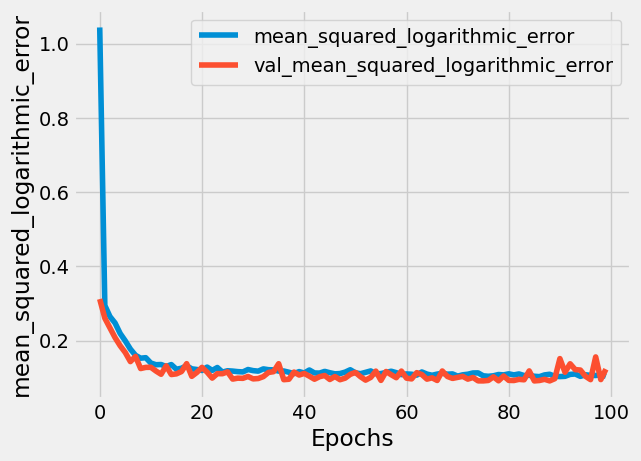

In [28]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [29]:
X_test['prediction'] = model.predict(X_test)

129/129 [==============================] - 0s 3ms/step
